# Train Notebook

In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

if "notebooks" in os.getcwd():
    print("Running in Jupyter Notebook")

from src.dataset import *
from src.config import *

loading annotations into memory...
Done (t=3.55s)
creating index...
index created!


In [4]:
# check gpu
import torch
print(torch.cuda.is_available())

True


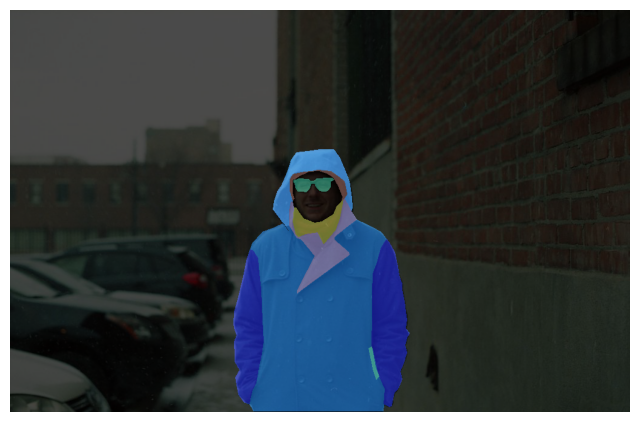

In [5]:
ids = db.getImgIds()
img_file = db.loadImgs(ids[3])[0]['file_name']

overlay_mask(img_file)

In [6]:
img = get_image(ids[0])
mask = get_mask(ids[0])
print(img.shape, mask.shape)

(1024, 1024, 3) (1024, 1024)


In [12]:
db.anns[0]

{'image_id': 16305,
 'category_id': 32,
 'attribute_ids': [218],
 'segmentation': [[471,
   390,
   461,
   412,
   457,
   430,
   454,
   455,
   454,
   473,
   457,
   483,
   469,
   489,
   477,
   492,
   485,
   498,
   493,
   499,
   499,
   496,
   500,
   490,
   494,
   479,
   487,
   461,
   485,
   445,
   483,
   434,
   487,
   433,
   489,
   426,
   489,
   412,
   484,
   403,
   480,
   395,
   477,
   392]],
 'bbox': [454.0, 390.0, 46.0, 109.0],
 'area': 3052,
 'iscrowd': 0,
 'id': 0}

In [ ]:
import pandas as pd
df_anns = pd.DataFrame(db.anns).T

In [27]:
df_anns[df_anns["image_id"] == 16305]

,image_id,category_id,attribute_ids,segmentation,bbox,area,iscrowd,id
0,16305,32,[218],"[[471, 390, 461, 412, 457, 430, 454, 455, 454,...","[454.0, 390.0, 46.0, 109.0]",3052,0,0
1,16305,31,"[204, 205, 159]","[[334, 329, 344, 307, 348, 293, 354, 282, 365,...","[271.0, 133.0, 98.0, 223.0]",12906,0,1
2,16305,31,"[205, 159]","[[522, 331, 523, 355, 515, 376, 510, 382, 512,...","[482.0, 323.0, 74.0, 169.0]",5794,0,2
3,16305,22,[],"[[348, 745, 356, 731, 364, 719, 376, 704, 392,...","[322.0, 658.0, 208.0, 112.0]",3838,0,3
4,16305,22,[],"[[466, 771, 483, 765, 489, 762, 492, 758, 494,...","[405.0, 749.0, 97.0, 213.0]",9415,0,4
5,16305,28,[163],"[[366, 309, 377, 306, 382, 304, 389, 298, 394,...","[365.0, 261.0, 111.0, 71.0]",1054,0,5
6,16305,0,"[225, 295, 137, 145, 115, 148, 149, 316, 317]","[[324, 395, 325, 423, 324, 436, 325, 465, 325,...","[271.0, 133.0, 285.0, 518.0]",78456,0,6


In [18]:
ann = db.anns[1]
img_id = ann['image_id']
bbox = ann['bbox']
category_id = ann['category_id']
filename = db.loadImgs(img_id)[0]['file_name']
print(category_id, bbox, filename)

31 [271.0, 133.0, 98.0, 223.0] 2f10b4d61e445fe5d0777723630a2905.jpg


In [ ]:
db_anns

In [5]:
# image = get_image(ids[1])
# # Convert image to [0.0, 1.0]
# # image = image / 255.0

# results = model.predict(image)  # predict on an image
# pred_boxes = results[0].boxes.data.cpu().numpy()
# pred_masks = results[0].masks.data.cpu().numpy()
# print("IMAGE SHAPE:", image.shape)
# print("PRED BOXES:", pred_boxes.shape)
# print("PRED MASKS:", pred_masks.shape)

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(image)
# ax[1].imshow(pred_masks[0])
# # ax[2].imshow(pred_masks[1])
# plt.show()

In [6]:
# model.train(data="fashion_v8.yaml", epochs=3)  # train the model
from ultralytics import YOLO

# Load a model
# "-seg" is added to the end of "yolov8X" for instance segmentation
model_coco = YOLO("yolov8n-seg.yaml")  # build a new model from scratch
model_coco = YOLO("yolov8n-seg.pt")  # load a pretrained model (recommended for training)
# Train the model
model_coco.train(data="coco128-seg.yaml", epochs=5, imgsz=640)

New https://pypi.org/project/ultralytics/8.1.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.33 🚀 Python-3.9.18 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco128-seg.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

100%|██████████| 6.79M/6.79M [00:01<00:00, 6.10MB/s]
Unzipping /home/alberto/Documentos/GitHub/OR_FashionParsing/datasets/coco128-seg.zip to /home/alberto/Documentos/GitHub/OR_FashionParsing/datasets/coco128-seg...: 100%|██████████| 263/263 [00:00<00:00, 3841.43file/s]

Dataset download success ✅ (3.2s), saved to /home/alberto/Documentos/GitHub/OR_FashionParsing/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, 

YOLOv8n-seg summary: 261 layers, 3409968 parameters, 3409952 gradients, 12.8 GFLOPs

Transferred 417/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/alberto/Documentos/GitHub/OR_FashionParsing/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1241.72it/s]

train: New cache created: /home/alberto/Documentos/GitHub/OR_FashionParsing/datasets/coco128-seg/labels/train2017.cache



val: Scanning /home/alberto/Documentos/GitHub/OR_FashionParsing/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/segment/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/5      3.42G      1.126      2.691      1.651      1.172        217        640: 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        128        929      0.596      0.548      0.586       0.44      0.577       0.52       0.55      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.43G      1.132      2.562      1.434      1.151        224        640: 100%|██████████| 8/8 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]


                   all        128        929      0.631      0.549      0.607      0.457      0.604      0.521      0.568      0.377

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.49G      1.092      2.522      1.348      1.173        216        640: 100%|██████████| 8/8 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]


                   all        128        929      0.588      0.574      0.622      0.469      0.589      0.529      0.584      0.389

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.34G      1.114       2.59      1.391      1.153        153        640: 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]


                   all        128        929      0.605      0.588      0.629      0.474      0.592      0.549      0.593      0.395

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.45G      1.086      2.611      1.336      1.146        249        640: 100%|██████████| 8/8 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]


                   all        128        929      0.645      0.572      0.634      0.479      0.618      0.542      0.596      0.397

5 epochs completed in 0.004 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 7.1MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 7.1MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.1.33 🚀 Python-3.9.18 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]


                   all        128        929      0.644      0.572      0.636       0.48      0.618      0.543      0.596      0.398
                person        128        254      0.819      0.677      0.785      0.557      0.801      0.657      0.749      0.407
               bicycle        128          6       0.53      0.167      0.403      0.238      0.534      0.167      0.356      0.203
                   car        128         46      0.621      0.196      0.289      0.167       0.63      0.196      0.252      0.107
            motorcycle        128          5          1      0.881      0.995      0.754          1      0.866      0.995      0.548
              airplane        128          6      0.669      0.833      0.922       0.73      0.536      0.667      0.711      0.535
                   bus        128          7      0.655      0.714      0.729      0.628      0.656      0.714      0.721      0.601
                 train        128          3      0.542      0.807   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c80e011d370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,

In [ ]:
results[0].masks.data[1].shape

torch.Size([640, 640])

In [7]:
from ultralytics.data.converter import convert_coco

convert_coco(labels_dir='datasets/fashion/annotations/')

Annotations /home/alberto/Documentos/GitHub/OR_FashionParsing/datasets/fashion/annotations/instances_attributes_train2020.json:   0%|          | 0/45623 [00:00<?, ?it/s]


TypeError: must be real number, not NoneType

In [ ]:
## Terminal
# !git clone -b main https://github.com/open-mmlab/mmsegmentation.git
# !cd mmsegmentation
# !pip install -v -e .

# Download models
# Install requirements
# !mim download mmsegmentation --config pspnet_r50-d8_4xb2-40k_cityscapes-512x1024 --dest .

# !pip3 install openmim
# !mim install mmengine
# !mim install "mmcv>=2.0.0"

In [ ]:
# import os
# if "mmsegmentation" not in os.getcwd():
#     os.chdir('mmsegmentation')
    
# from mmseg.apis import inference_model, init_model, show_result_pyplot
# import mmcv

# config_file = 'pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
# checkpoint_file = 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# # build the model from a config file and a checkpoint file
# model = init_model(config_file, checkpoint_file, device='cuda:0')

# # test a single image and show the results
# img = 'demo/demo.png'  # or img = mmcv.imread(img), which will only load it once
# result = inference_model(model, img)
# # visualize the results in a new window
# show_result_pyplot(model, img, result, show=True)
# # or save the visualization results to image files
# # you can change the opacity of the painted segmentation map in (0, 1].
# show_result_pyplot(model, img, result, show=True, out_file='result.jpg', opacity=0.5)
# # test a video and show the results
# video = mmcv.VideoReader('video.mp4')
# for frame in video:
#    result = inference_model(model, frame)
#    show_result_pyplot(model, frame, result, wait_time=1)